<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Estatística
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Média e Variância;</li>
  <li>Ordem e Posição;</li>
  <li>Correlação.</li>
</ol>

---

# **Exercícios**

## 1\. Tráfego de São Paulo

Neste exercício, vamos continuar a analisar os dados de mobilidade urbana da cidade de São Paulo. A base de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv) e é uma copia do dado original, presente neste [link](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil). A base de dados contem a quantidade de acidentes ocorridos na cidade entre 14/12/09 e 18/12/09, das 07:00h ás 20:00h, agregados em intervalos de 30 minutos.

In [90]:
import pandas as pd
import numpy as np
import requests
from requests.exceptions import HTTPError, RequestException
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
URL = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv'
nome_arquivo = 'traffic.csv'

try:
    respota = requests.get(URL)
    respota.raise_for_status()

    with open(nome_arquivo, 'wb',) as arquivo:
        arquivo.write(respota.content)

except HTTPError as err_http:
    print(f'Erro de HTTP: {err_http}')

except ConnectionError as err_con:
    print(f'Erro de conexão: {err_con}')

except TimeoutError as err_timeout:
    print(f'Tempo de resposta excedido: {err_timeout}')

except RequestException as err_req:
    print(f'Erro na requisição: {err_req}')

except Exception as exc:
    print(f'Ocorreu um erro inesperado: {exc}')
    

In [92]:
df = pd.read_csv(nome_arquivo, sep=';')

- **Exemplo**: (para relembrar)

O código abaixo extrai a 13ª linha do arquivo que representa a 14ª meia hora do dia 14/12/09, contadas a partir das 07:00h, ou seja, todos os incidentes ocorridos na cidade no dia em questão entre as 13:30h e 14:00h. Vemos, por exemplo, que dois ônibus e dois caminhões ficaram paradados nas ruas da cidade, atrapalhando o tráfego.

In [93]:
df.iloc[[13]]

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
13,14,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"4,9"


### **1.1. Agregação** 

Neste primeira atividade, você deve gerar um array NumPy por dia. Para cada array você deve somar todos os incidentes que aconteceram naquela meia hora. Sendo assim, cada array deve ter 27 posições, cada qual com a soma dos incidentes daquela meira hora.

**Dica**: Você deve remover a primeira e a última coluna.

**Dica**: Os arrays devem ter os seguintes valores:

```python
14: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3]
15: [3, 0, 0, 0, 2, 4, 2, 1, 3, 0, 2, 0, 2, 3, 2, 2, 4, 7, 6, 3, 0, 1, 1, 5, 4, 6, 0]
16: [1, 1, 2, 4, 4, 5, 3, 2, 4, 2, 1, 1, 3, 6, 2, 0, 2, 8, 4, 6, 4, 1, 2, 7, 15, 4, 0]
17: [4, 1, 1, 0, 0, 0, 2, 3, 2, 7, 2, 1, 7, 3, 6, 4, 3, 2, 2, 3, 2, 5, 2, 0, 1, 4, 15]
18: [10, 1, 1, 5, 5, 7, 3, 4, 3, 1, 2, 3, 2, 2, 6, 2, 2, 4, 2, 3, 0, 3, 3, 2, 3, 6, 0]
```

In [94]:
# resposta da questão 1.1

data =  None

try:
    with open(nome_arquivo, mode='r', encoding='utf8') as fp:
        fp.readline() # Ignorar o cabeçalho
        data = fp.read()

except FileNotFoundError:
    print(f'Erro: O arquivo "{nome_arquivo}" não foi encontrado.')
    exit()

except Exception as exc:
    print(f'Erro ao ler o arquivo {exc}')
    exit()

incidentes_dia = dict()
incidentes_30min = list()
incidentes = None
dia = 14 # Dia Inicial

# Processar as linhas do arquivo.
for linha in data.split('\n'):
    if not linha.strip(): # Ignorando linhas vazias.
        continue
    
    # Somar os incidentes (Ignorando a primeira e a última coluna)
    linha_lista = linha.split(';')
    try:
        incidentes = sum(map(int, linha_lista[1:-1]))
        incidentes_30min.append(incidentes)

        # Se a primeira coluna for o '27', indica o fim do dia.
        if linha_lista[0] == '27':
            incidentes_dia[dia] = np.array(incidentes_30min)
            dia += 1
            incidentes_30min.clear() # Limpa a lista para o próximo dia.
    
    except ValueError as err_value:
        print(f'Erro ao processar a linha: {linha}. Detalhes: {err_value}')
        continue

# Exibir os incidentes por dia.
for dia, incidentes in incidentes_dia.items():
    print(f'{dia}: {incidentes}')


14: [0 0 0 0 0 0 0 0 0 0 0 1 0 5 2 0 0 0 0 0 1 0 0 0 2 2 3]
15: [3 0 0 0 2 4 2 1 3 0 2 0 2 3 2 2 4 7 6 3 0 1 1 5 4 6 0]
16: [ 1  1  2  4  4  5  3  2  4  2  1  1  3  6  2  0  2  8  4  6  4  1  2  7
 15  4  0]
17: [ 4  1  1  0  0  0  2  3  2  7  2  1  7  3  6  4  3  2  2  3  2  5  2  0
  1  4 15]
18: [10  1  1  5  5  7  3  4  3  1  2  3  2  2  6  2  2  4  2  3  0  3  3  2
  3  6  0]


### **1.2. Métricas** 

Para cada array você deve calcular as seguintes métricas: 

 - **média**;
 - **desvio padrão**.

In [95]:
# resposta da questão 1.2

metricas_incidentes = dict()

for dia, incidentes in incidentes_dia.items():
    media = np.mean(incidentes)
    desvio_padrao = np.std(incidentes)
    variancia = np.var(incidentes)
    metricas_incidentes[dia] = {
        'média': media,
        'desvio padrão': desvio_padrao,
        'variância': variancia                       
        }

for dia, metricas in metricas_incidentes.items():
    print(f'Dia {dia} ->    Média: {metricas['média']:.2f}  Desvio Padrão: {metricas['desvio padrão']:.2f}  Variância: {metricas['variância']:.2f}')

Dia 14 ->    Média: 0.59  Desvio Padrão: 1.19  Variância: 1.43
Dia 15 ->    Média: 2.33  Desvio Padrão: 2.02  Variância: 4.07
Dia 16 ->    Média: 3.48  Desvio Padrão: 3.05  Variância: 9.29
Dia 17 ->    Média: 3.04  Desvio Padrão: 3.05  Variância: 9.29
Dia 18 ->    Média: 3.15  Desvio Padrão: 2.19  Variância: 4.79


### **1.3. Interpretação** 

Baseado nos resultados da questão 1.2, responda:

> Qual dia apresenta a maior média de acidentes por meia hora?

**Resposta:** Dia 16

> Qual dia apresenta a menor variação de acidentes por meia hora?

**Resposta:** Dia 14

In [96]:
metricas_df = pd.DataFrame(metricas_incidentes)
metricas_df = metricas_df.T.reset_index()
metricas_df = metricas_df.rename(columns={'index': 'dia'})
metricas_df.head()

,dia,média,desvio padrão,variância
0,14,0.592593,1.194409,1.426612
1,15,2.333333,2.018434,4.074074
2,16,3.481481,3.047408,9.286694
3,17,3.037037,3.048758,9.294925
4,18,3.148148,2.189262,4.792867


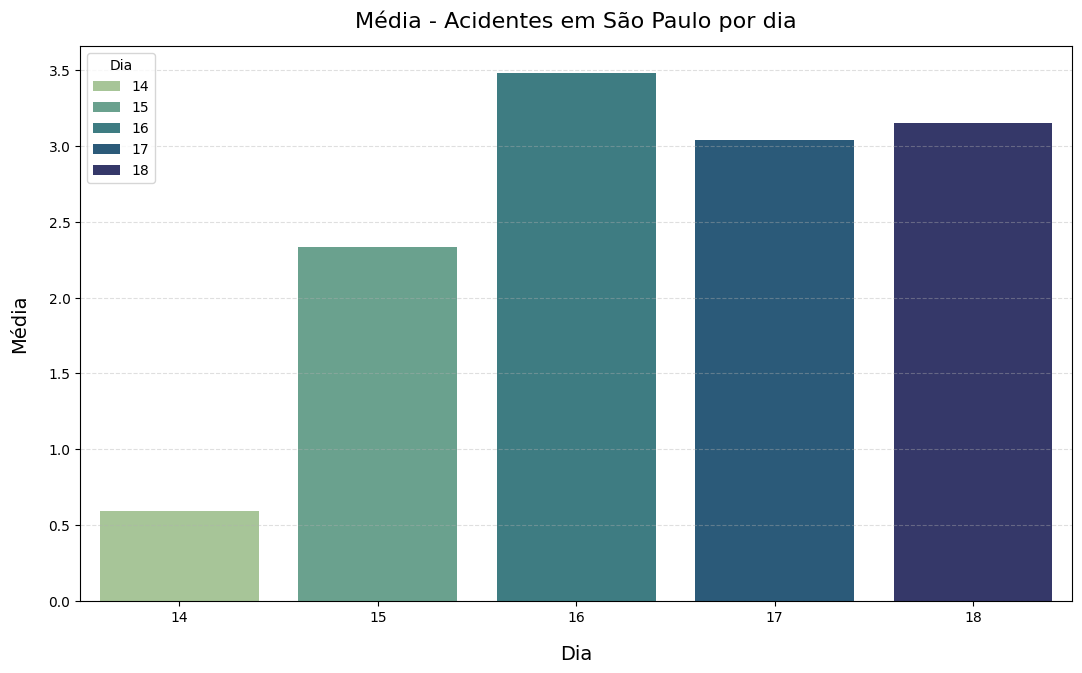

In [97]:
plt.figure(figsize=(12.8, 7.2))

sns.barplot(data=metricas_df, x='dia', y='média', hue='dia', palette='crest')

plt.title('Média - Acidentes em São Paulo por dia', fontsize=16, pad=14)
plt.xlabel('Dia', fontsize=14, labelpad=14)
plt.ylabel('Média', fontsize=14, labelpad=14)
plt.legend(title='Dia', loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

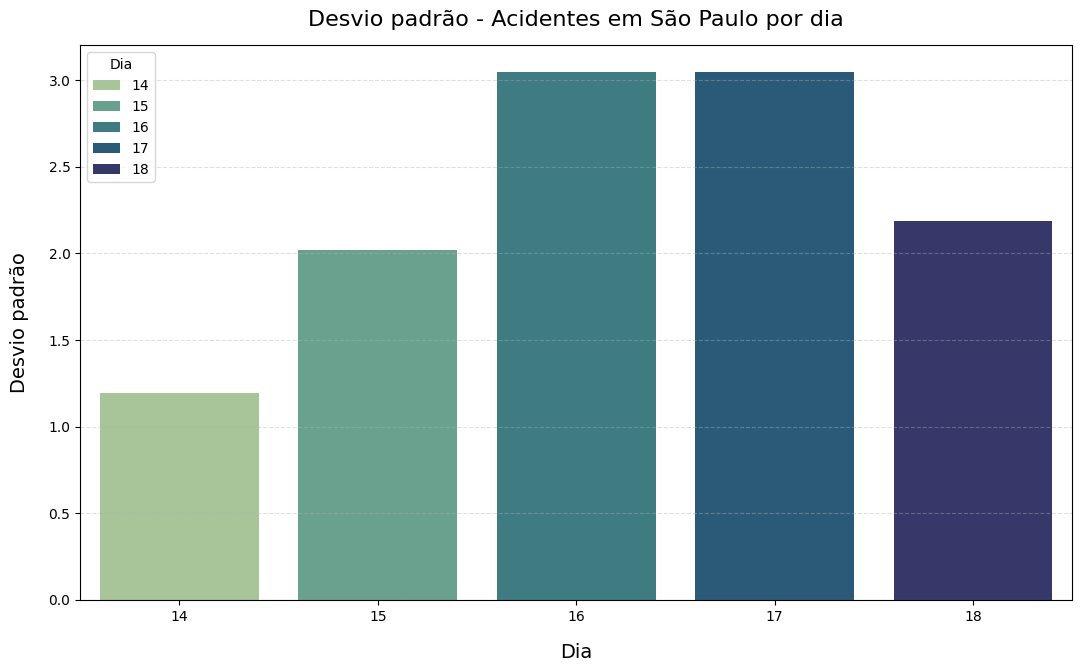

In [98]:
plt.figure(figsize=(12.8, 7.2))

sns.barplot(data=metricas_df, x='dia', y='desvio padrão', hue='dia', palette='crest')

plt.title('Desvio padrão - Acidentes em São Paulo por dia', fontsize=16, pad=14)
plt.xlabel('Dia', fontsize=14, labelpad=14)
plt.ylabel('Desvio padrão', fontsize=14, labelpad=14)
plt.legend(title='Dia', loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

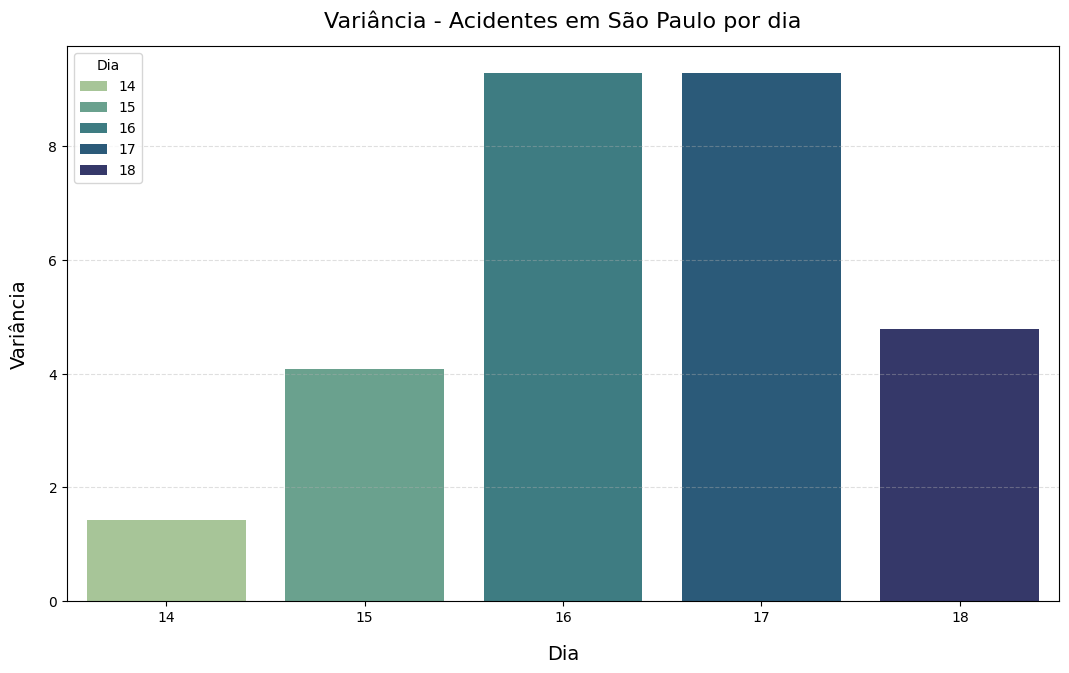

In [99]:
plt.figure(figsize=(12.8, 7.2))

sns.barplot(data=metricas_df, x='dia', y='variância', hue='dia', palette='crest')

plt.title('Variância - Acidentes em São Paulo por dia', fontsize=16, pad=14)
plt.xlabel('Dia', fontsize=14, labelpad=14)
plt.ylabel('Variância', fontsize=14, labelpad=14)
plt.legend(title='Dia', loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()